In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.datasets import load_digits

# Métricas de Regressão

Usualmente, a pontuação $R^2$ é suficiente.
<ul>
<li> Ela computa o quão bem instâncias futuras serão preditas.
<li> A melhor pontuação possível é igual a 1.0 .
<li> Pontuação com predição constante é igual a 0.0 .
<li> Há casos (geralmente em problemas não lineares) em que R<sup>2</sup> é negativo.
</ul>

Métricas alternativas:
<ul>
<li> <code> mean_absolute error</code> (Diferença absoluta entre os valores reais e preditos).
<li> <code> mean_square_error</code>  (Diferença quadratica entre os valores reais e preditos).
<li> <code> media_absolute_error</code>  (Robusto a <em>outliers</em>).
</ul>

In [9]:
diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Modelo Linear, coeficientes:  [-698.80206267]
Erro quadrático médio (Modelo Fictício): 4965.13
Erro quadrático médio (Modelo Linear): 4646.74
Pontuação R^2 (Modelo Fictício): -0.000
Pontuação R^2 (Modelo Linear): 0.064


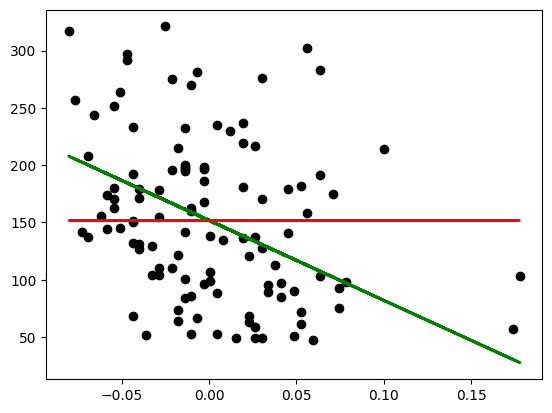

In [10]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg_dm_mean = DummyRegressor(strategy='mean').fit(X_train, y_train)

y_predict = lin_reg.predict(X_test)
y_predict_dm_mean = lin_reg_dm_mean.predict(X_test)

print('Modelo Linear, coeficientes: ', lin_reg.coef_)

print(f'Erro quadrático médio (Modelo Fictício): {mean_squared_error(y_test, y_predict_dm_mean):.2f}')
print(f'Erro quadrático médio (Modelo Linear): {mean_squared_error(y_test, y_predict):.2f}')

print(f'Pontuação R^2 (Modelo Fictício): {r2_score(y_test, y_predict_dm_mean):.3f}')
print(f'Pontuação R^2 (Modelo Linear): {r2_score(y_test, y_predict):.3f}')

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dm_mean, color='red', linestyle='dashed', linewidth=2, label='dummy')
plt.show()

# Seleção de modelo utilizando métricas de avaliação

### Exemplo de validação cruzada

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1

clf = SVC(kernel='linear', C=1)

print(f'Validação-Cruzada (Acurácia)', cross_val_score(clf, X, y, cv=5))
print(f'Validação-Cruzada (AUC)', cross_val_score(clf, X, y, cv=5, scoring='roc_auc'))
print(f'Validação-Cruzada (Revocação)', cross_val_score(clf, X, y, cv=5, scoring='recall'))

Validação-Cruzada (Acurácia) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Validação-Cruzada (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Validação-Cruzada (Revocação) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


### Exemplo de Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf', C=1)
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf, param_grid=grid_values)
grid_clf_acc.fit(X_train, y_train)
y_dec_fn_scores_acc = grid_clf_acc.decision_function(X_test)

print('Melhor parâmetro grid (max. acurácia): ', grid_clf_acc.best_params_)
print('Melhor pontuação grid (acurácia): ', grid_clf_acc.best_score_)


grid_clf_auc = GridSearchCV(clf, param_grid=grid_values, scoring='roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_dec_fn_scores_auc = grid_clf_auc.decision_function(X_test)


print('AUC (Conjunto de teste): ', roc_auc_score(y_test, y_dec_fn_scores_auc))
print('Melhor parâmetro grid (max. AUC): ', grid_clf_auc.best_params_)
print('Melhor pontuação grid (AUC): ', grid_clf_auc.best_score_)



Melhor parâmetro grid (max. acurácia):  {'gamma': 0.001}
Melhor pontuação grid (acurácia):  0.9985157648354676
AUC (Conjunto de teste):  0.99982858122393
Melhor parâmetro grid (max. AUC):  {'gamma': 0.001}
Melhor pontuação grid (AUC):  1.0


# Exemplo de classificação 2-características usando o conjunto de dados de dígitos

### Otimizando um classificador utilizando diferentes métricas de avaliação

Melhor parâmetro (max. precision): {'class_weight': {1: 2}}
Melhor pontuação grid (precision): 0.5214285714285715
Melhor parâmetro (max. recall): {'class_weight': {1: 50}}
Melhor pontuação grid (recall): 0.9214285714285714
Melhor parâmetro (max. f1): {'class_weight': {1: 3}}
Melhor pontuação grid (f1): 0.5159633136460032
Melhor parâmetro (max. roc_auc): {'class_weight': {1: 4}}
Melhor pontuação grid (roc_auc): 0.8911701665756739


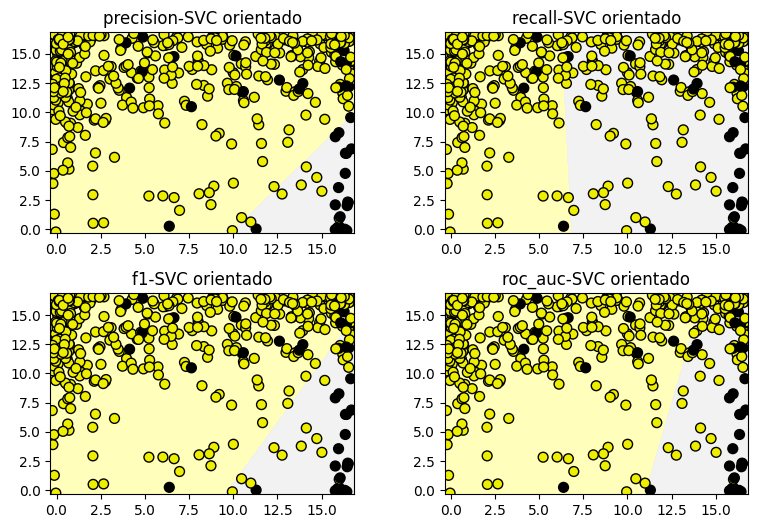

In [13]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

jitter_delta = 0.25
X_twovar_train = X_train[:, [20, 59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovat_test = X_test[:, [20, 59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight' : ['balanced', {1:2}, {1:3}, {1:4}, {1:5}, {1:10}, {1:20}, {1:50}]}
plt.figure(figsize=(9, 6))

for i, eval_metric in enumerate(('precision', 'recall', 'f1', 'roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    
    print(f'Melhor parâmetro (max. {eval_metric}): {grid_clf_custom.best_params_}')
    print(f'Melhor pontuação grid ({eval_metric}): {grid_clf_custom.best_score_}')
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovat_test, y_test,
                                              None, None, None, plt.subplot(2, 2, i + 1))
    
    plt.title(eval_metric + '-SVC orientado')

plt.show()

### Curva de Precisão-Revocação para o classificador SVC padrão (Com peso das classes balanceados)

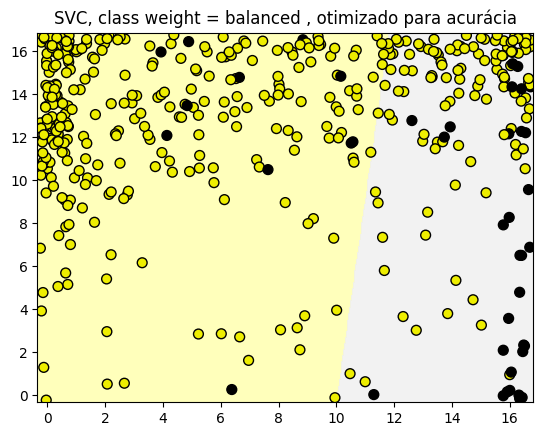

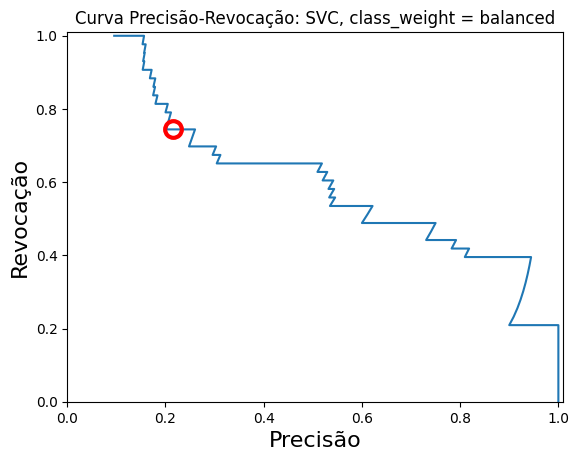

No threshold igual a zero, precisão = 0.22, revocação = 0.74


In [14]:
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)
y_scores = clf.decision_function(X_twovat_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovat_test, y_test,
                                  title='SVC, class weight = balanced , otimizado para acurácia')
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title('Curva Precisão-Revocação: SVC, class_weight = balanced')
plt.plot(precision, recall, label='Curva Precisão-Revocação')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precisão', fontsize=16)
plt.ylabel('Revocação', fontsize=16)
plt.show()

print(f'No threshold igual a zero, precisão = {closest_zero_p:.2f}, revocação = {closest_zero_r:.2f}')